In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
#importing libraries

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
# loading data

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

#data cleanup

Lets now say we want to now know what are the top skills for a data analyst. For this, we need to use the **df.explode()** method on the 'job_skills' column so we can count the frequency that each skill appears: 

- df.explode(column, ignore_index)

This takes 2 parameters: column and ignore_index. Column refers to the index label/column(s) to explode

The explode method takes a list in a given row and ensures that each skill is listed in a separate row. For instance, in index 1, we see skills such as R, Python, SQL etc that a data analyst must possess. Using this method R, Python and SQL will be assigned to its individual row, containing the same job_title_short. 

In [15]:
help(df.explode)

Help on method explode in module pandas.core.frame:

explode(column: 'IndexLabel', ignore_index: 'bool' = False) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Transform each element of a list-like to a row, replicating index values.
    
    Parameters
    ----------
    column : IndexLabel
        Column(s) to explode.
        For multiple columns, specify a non-empty list with each element
        be str or tuple, and all specified columns their list-like data
        on same row of the frame must have matching length.
    
        .. versionadded:: 1.3.0
            Multi-column explode
    
    ignore_index : bool, default False
        If True, the resulting index will be labeled 0, 1, …, n - 1.
    
    Returns
    -------
    DataFrame
        Exploded lists to rows of the subset columns;
        index will be duplicated for these rows.
    
    Raises
    ------
    ValueError :
        * If columns of the frame are not unique.
        * If specified columns

## Example

In [3]:
df[['job_title_short','job_skills']].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [6]:
df_skills = df[['job_title_short', 'job_skills']].loc[1:2]
df_skills

,job_title_short,job_skills
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."


In [8]:
df_skills.explode('job_skills')
# this provides every single value in the list is its individual row, where we now have 6 
# data analyst rows and 9 data engineer rows. We can then run value.counts() on the job_skills
# column and plot this data

,job_title_short,job_skills
1,Data Analyst,r
1,Data Analyst,python
1,Data Analyst,sql
1,Data Analyst,nosql
1,Data Analyst,power bi
1,Data Analyst,tableau
2,Data Engineer,python
2,Data Engineer,sql
2,Data Engineer,c#
2,Data Engineer,azure


In [9]:
df_skills.explode('job_skills').value_counts('job_skills')
# counts the frequency that a given skills appear in the df_skills dataframe

job_skills
python        2
sql           2
airflow       1
azure         1
c#            1
dax           1
docker        1
jenkins       1
kubernetes    1
nosql         1
power bi      1
r             1
tableau       1
Name: count, dtype: int64

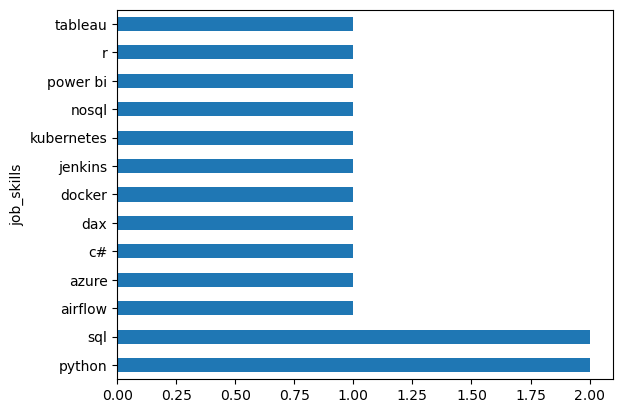

In [11]:
df_skills.explode('job_skills').value_counts('job_skills').plot(kind='barh')
plt.show()

## Finding the skill count for data analysts

In [46]:
df_exploded = df.explode('job_skills')
df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [20]:
df_exploded.value_counts('job_skills')
# now, we want to groupby job_title_short and job_skills so we can see the frequency of each
# skill in a given job

job_skills
sql             384849
python          380909
aws             145381
azure           132527
r               130892
                 ...  
dingtalk             1
rocketchat           1
rubyon rails         1
wimi                 1
msaccess             1
Name: count, Length: 252, dtype: int64

In [23]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()
skills_count

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [24]:
type(skills_count)
# Note that this is a series, but we want to convert this into a dataframe- we do this using
# the reset index method so we get the full (exploded) table with repeated values

pandas.core.series.Series

In [26]:
df_skills_count = skills_count.reset_index(name = 'skill_count')
df_skills_count

,job_title_short,job_skills,skill_count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


Now we can sort these values by skill count, in order of highest to lowest.

In [29]:
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


We now have what we need to plot this data. Finally, we just have to filter the results to include only 'Data Analysts' and plot this data.

Note: because we are plotting a dataframe, we have to specify the columns in the x axis and y axis.

In [38]:
job_title = 'Data Analyst'
top_skills = 10

df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

df_skills_final

,job_title_short,job_skills,skill_count
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


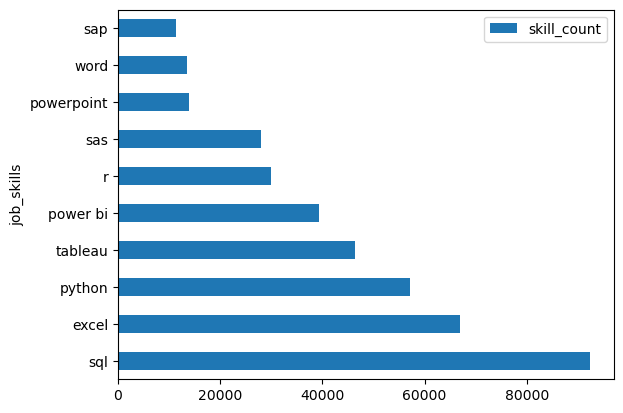

In [39]:
df_skills_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.show()

A  common problem with these graphs is that we want the highest skill count to be in the reverse order (highest starting from the top). 

We can do this using matplotlib, specifcally the .axes.invert_yaxis() which we get from the plt.gca() method

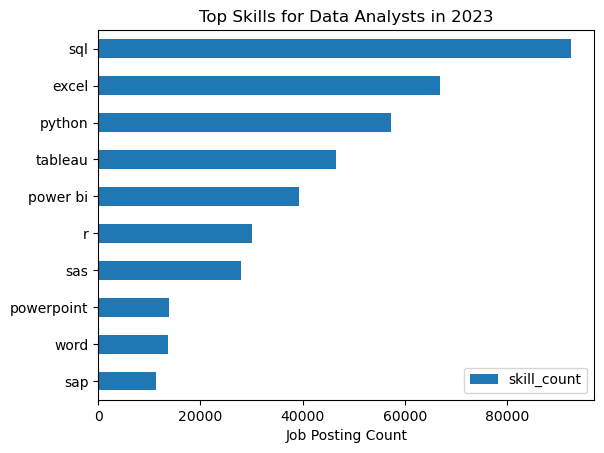

In [43]:
df_skills_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().axes.invert_yaxis()
plt.title('Top Skills for Data Analysts in 2023')
plt.ylabel('')
plt.xlabel('Job Posting Count')
plt.show()

To remove figure legend, we can use the following code that makes the figure legend invisible:

- plt.legend().set_visible(False)

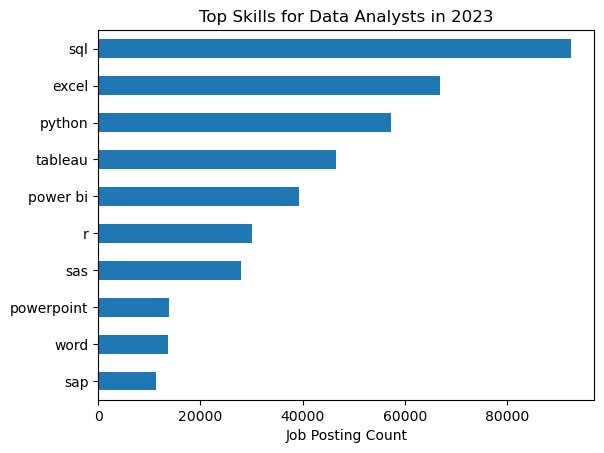

In [45]:
df_skills_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().axes.invert_yaxis()
plt.title('Top Skills for Data Analysts in 2023')
plt.ylabel('')
plt.xlabel('Job Posting Count')
plt.legend().set_visible(False)
plt.show()

If lets say we want to look at the top 10 skills for data engineers, we can simply adjust this in the 'job_title' variable and plot the results.